<a href="https://colab.research.google.com/github/joe94113/Deep-Learning-course/blob/main/%E6%8D%B2%E7%A9%8D%E7%B6%B2%E8%B7%AFcnn_cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print("訓練資料:",x_train.shape)
print("測試資料:",x_test.shape)

訓練資料: (50000, 32, 32, 3)
測試資料: (10000, 32, 32, 3)


In [ ]:
trans = {0:"飛機", 1:"汽車", 2:"鳥",
      3: "貓", 4:"鹿", 5:"狗",
      6:"青蛙", 7:"馬", 8:"船",
      9:"卡車"}

是甚麼? 馬


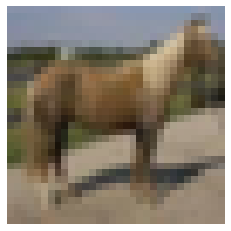

In [ ]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
c = random.randint(0,4999)
print("是甚麼?", trans[y_train[c][0]])
plt.axis("off") # 不顯示xy軸
plt.imshow(x_train[c]) # 畫圖

輸出層如果只有一個函數，可以選用sigmoid函數

輸出層，如果有兩個以上輸出神經，請選用softmax函數

如果是中間層，只有一種選擇relu函數

In [ ]:
# 建立簡化版VGG卷積模型
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D # 卷積，池化
from keras.layers import Flatten # 可以直接攤開
cnn = Sequential()
# 卷積+池化
cnn.add(Conv2D(32, (3,3), 
        padding="same", 
        activation="relu",
        input_shape=(32,32,3))) # Conv2D(過濾器大小通常64, (過濾器寬,高))
cnn.add(MaxPooling2D(pool_size=(2,2))) # 池化縮小兩倍，預設也是(2,2)
cnn.add(Conv2D(64, (3,3), 
        padding="same", 
        activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
# 攤開成一維，才能進mlp
cnn.add(Flatten()) 
# mlp
cnn.add(Dense(256, activation="relu"))
cnn.add(Dropout(0.25)) # 捨棄掉一些神經線，迫使用另外角度看，通常捨棄25~50%
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1048832   
_________________________________________________________________
dropout (Dropout)            (None, 256)              

輸出一個神經元選擇:binary_crossentropy，多個神經元選擇categorical_crossentropy

In [ ]:
# 確定模型
cnn.compile(loss="categorical_crossentropy",
      optimizer="adam",
      metrics=["accuracy"])

In [ ]:
# 資料處理
x_train_norm = x_train / 255 # 0~255變成0~1
x_test_norm = x_test / 255 # 0~255變成0~1

In [ ]:
# 答案處理，變成十個機率，one_hot encodin，
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("Demo:", y_train_cat[0])

Demo: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
cnn.fit(x_train_norm,
    y_train_cat,
    batch_size=200,
    epochs=10,
    validation_split=0.1,
    verbose=2)

Epoch 1/10
225/225 - 2s - loss: 1.6719 - accuracy: 0.3959 - val_loss: 1.3054 - val_accuracy: 0.5382
Epoch 2/10
225/225 - 1s - loss: 1.2833 - accuracy: 0.5394 - val_loss: 1.1386 - val_accuracy: 0.6090
Epoch 3/10
225/225 - 1s - loss: 1.1301 - accuracy: 0.5981 - val_loss: 1.0260 - val_accuracy: 0.6382
Epoch 4/10
225/225 - 1s - loss: 1.0274 - accuracy: 0.6368 - val_loss: 0.9728 - val_accuracy: 0.6594
Epoch 5/10
225/225 - 1s - loss: 0.9545 - accuracy: 0.6636 - val_loss: 0.9317 - val_accuracy: 0.6714
Epoch 6/10
225/225 - 1s - loss: 0.8890 - accuracy: 0.6868 - val_loss: 0.8751 - val_accuracy: 0.6890
Epoch 7/10
225/225 - 1s - loss: 0.8333 - accuracy: 0.7065 - val_loss: 0.8592 - val_accuracy: 0.7058
Epoch 8/10
225/225 - 1s - loss: 0.7856 - accuracy: 0.7230 - val_loss: 0.8231 - val_accuracy: 0.7178
Epoch 9/10
225/225 - 1s - loss: 0.7427 - accuracy: 0.7393 - val_loss: 0.8245 - val_accuracy: 0.7176
Epoch 10/10
225/225 - 1s - loss: 0.6926 - accuracy: 0.7566 - val_loss: 0.8238 - val_accuracy: 0.7218

In [ ]:
cnn.evaluate(x_test_norm, y_test_cat) # 返回的是损失值和你选定的指标值（例如，精度accuracy）

313/313 [==============================] - 1s 3ms/step - loss: 0.8491 - accuracy: 0.7083


[0.8491076231002808, 0.708299994468689]

In [ ]:
from sklearn.metrics import confusion_matrix # 混淆矩陣
import pandas as pd
pre = cnn.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0,1,2,3,4,5,6,7,8,9
0,763,19,33,11,14,18,4,19,85,34
1,20,813,8,14,2,7,3,12,30,91
2,70,5,501,68,118,104,42,70,10,12
3,19,10,47,492,64,247,35,53,21,12
4,20,3,44,52,666,51,18,126,19,1
5,12,1,19,135,43,698,10,63,14,5
6,6,5,34,96,86,40,697,20,9,7
7,7,1,8,27,39,67,1,842,4,4
8,52,39,6,15,5,12,5,9,829,28
9,29,83,6,14,4,12,5,32,33,782


In [ ]:
y_test.reshape(10000) #　變成一維

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

到底有幾個錯誤: 2922


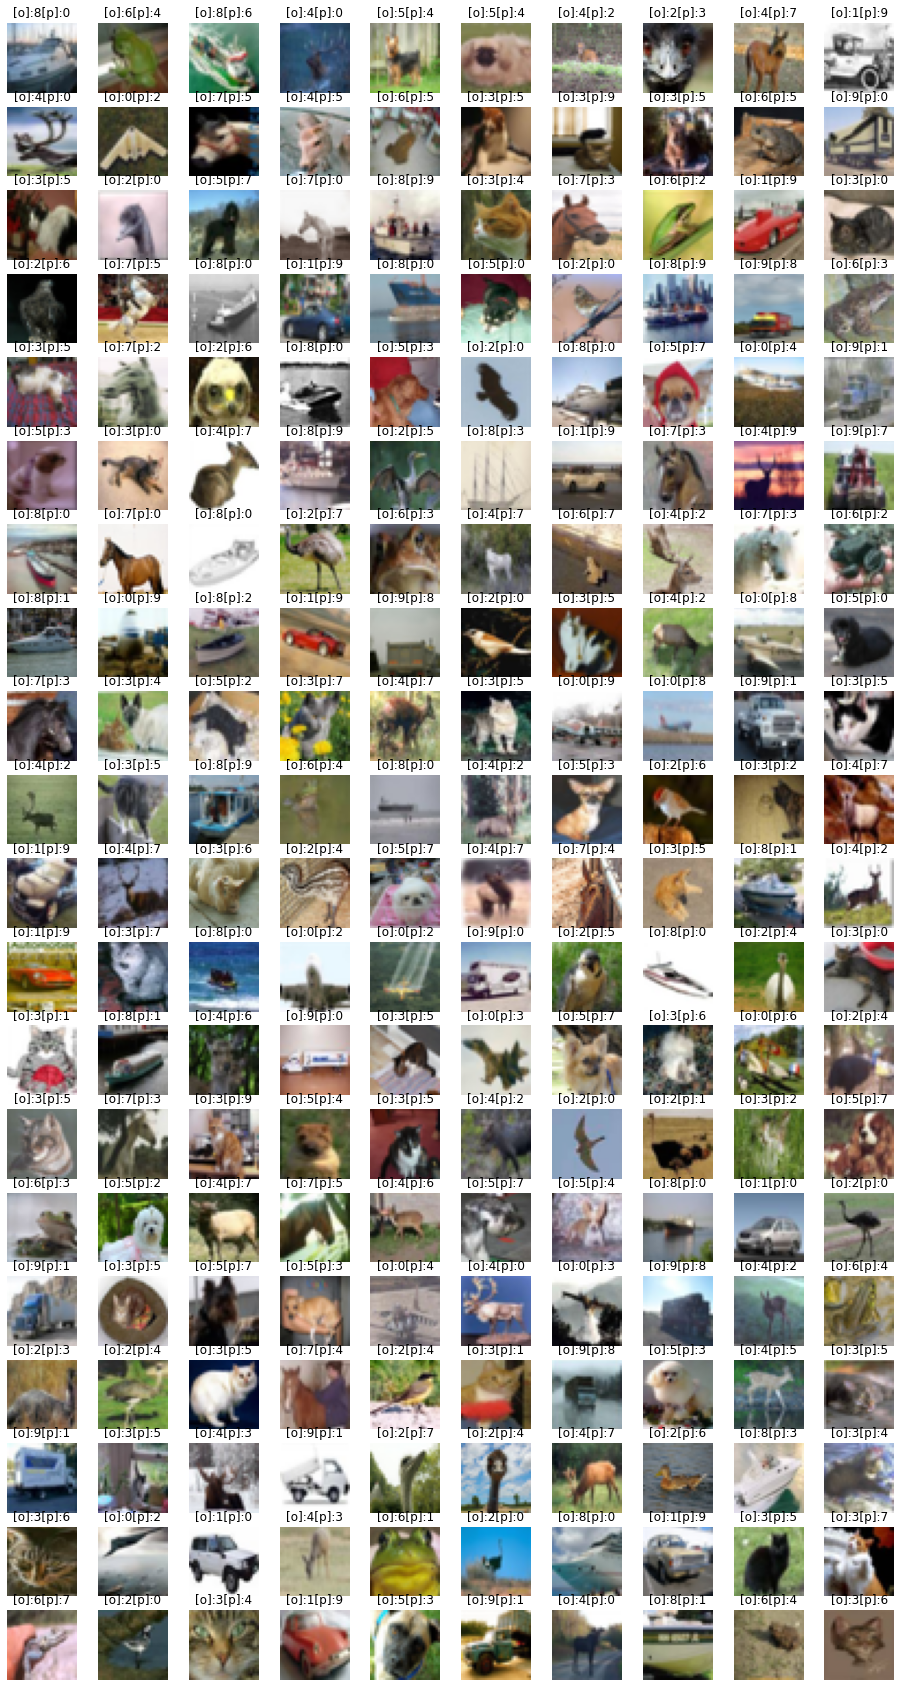

In [ ]:
import numpy as np
false_index = np.nonzero(pre != y_test.reshape(10000))[0] # 找出判斷錯誤位置
print("到底有幾個錯誤:", len(false_index))
false_img = x_test[false_index]
ori_label = y_test[false_index]
pre_label = pre[false_index]

width = 10
height = int(len(false_index) / 10) + 1
plt.figure(figsize=(16, 450)) # 寬14英寸，高450
# 查看哪些錯了，o:答案，p:預測失敗
for (index, img) in enumerate(false_img[:200]):
  plt.subplot(height, width, index+1)
  msg = "[o]:" + str(ori_label[index][0]) + "[p]:" + str(pre_label[index])
  plt.title(msg)
  plt.axis("off") # 不顯示軸線
  plt.imshow(img)